In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
path = "./data/Mammoth Springs Yellowstone.csv"
df = pd.read_csv(path)
df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN
0,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-01,NaN,NaN,0.01,0.5,10.0,32.0,11.0
1,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-02,NaN,NaN,0.00,0.0,10.0,28.0,8.0
2,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-03,NaN,NaN,0.00,0.0,10.0,28.0,6.0
3,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-04,NaN,NaN,0.00,0.0,10.0,27.0,13.0
4,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-05,NaN,NaN,0.00,0.0,10.0,25.0,13.0


In [29]:
# Find the number of staions (Theres only one)
stations = df["STATION"].unique()
print(stations)

['USC00489905']


In [30]:
# Key missing values TMAX, TMIN, PRCP
cleaned = df.copy()

cleaned.dropna(subset=["TMAX", "TMIN", "PRCP"], inplace=True)
cleaned.drop(columns=["DAPR", "MDPR"], inplace=True)

cleaned.info()

cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  706 non-null    object 
 1   NAME     706 non-null    object 
 2   DATE     706 non-null    object 
 3   PRCP     706 non-null    float64
 4   SNOW     706 non-null    float64
 5   SNWD     706 non-null    float64
 6   TMAX     706 non-null    float64
 7   TMIN     706 non-null    float64
dtypes: float64(5), object(3)
memory usage: 49.6+ KB


,PRCP,SNOW,SNWD,TMAX,TMIN
count,706.000000,706.000000,706.000000,706.000000,706.000000
mean,0.040921,0.194334,3.252125,54.893768,28.259207
std,0.101796,0.756060,6.160400,20.669264,15.687713
min,0.000000,0.000000,0.000000,-8.000000,-31.000000
25%,0.000000,0.000000,0.000000,37.250000,17.000000
50%,0.000000,0.000000,0.000000,53.000000,30.000000
75%,0.020000,0.000000,3.000000,73.000000,41.000000
max,0.960000,9.500000,23.000000,96.000000,63.000000


In [ ]:
cleaned["MONTH"] = pd.to_datetime(cleaned["DATE"]).dt.month
cleaned["YEAR"] = pd.to_datetime(cleaned["DATE"]).dt.year
cleaned["MEAN_TEMP"] = (cleaned["TMAX"] + cleaned["TMIN"]) / 2


In [ ]:
cleaned23 = cleaned[cleaned["YEAR"] == 2023]
cleaned23.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,MONTH,YEAR,MEAN_TEMP
0,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-01,0.01,0.5,10.0,32.0,11.0,1,2023,21.5
1,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-02,0.00,0.0,10.0,28.0,8.0,1,2023,18.0
2,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-03,0.00,0.0,10.0,28.0,6.0,1,2023,17.0
3,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-04,0.00,0.0,10.0,27.0,13.0,1,2023,20.0
4,USC00489905,"YELLOWSTONE PARK MAMMOTH, WY US",2023-01-05,0.00,0.0,10.0,25.0,13.0,1,2023,19.0


In [62]:
grouped = cleaned23.groupby('MONTH')[['MEAN_TEMP','TMAX','TMIN','PRCP','SNOW']].agg({'MEAN_TEMP': 'mean', 'TMAX':'mean','TMIN':'mean', 'PRCP':'sum', 'SNOW':'sum'}).reset_index()
grouped

,MONTH,MEAN_TEMP,TMAX,TMIN,PRCP,SNOW
0,1,19.387097,28.354839,10.419355,0.76,13.7
1,2,19.160714,30.250000,8.071429,0.64,7.3
2,3,23.032258,34.709677,11.354839,1.80,14.7
3,4,35.454545,49.409091,21.500000,0.39,4.2
4,5,52.532258,67.903226,37.161290,0.42,0.0
5,6,55.366667,69.800000,40.933333,2.66,0.0
6,7,65.383333,84.033333,46.733333,1.01,0.0
7,8,63.266667,78.366667,48.166667,3.29,0.0
8,9,54.916667,69.600000,40.233333,2.03,0.0
9,10,41.050000,54.066667,28.033333,2.50,13.5


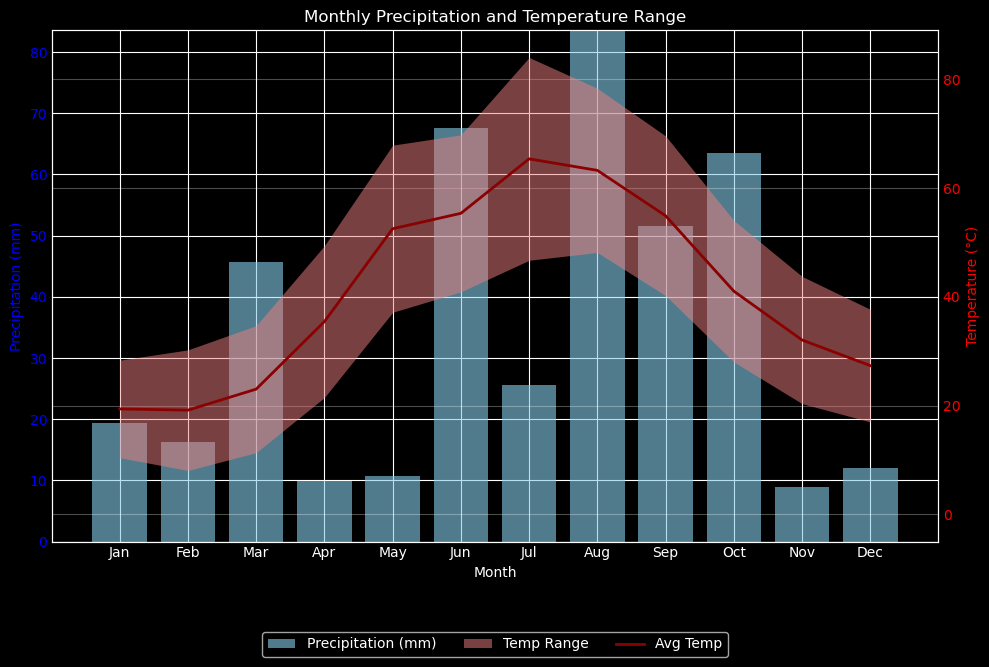

In [ ]:
# KEEP
# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Data
x = grouped["MONTH"]
y1 = grouped["TMAX"]
y2 = grouped["TMIN"]

# Secondary y-axis for temperatures
ax2 = ax1.twinx()
ax2.fill_between(
    x, y1, y2, alpha=0.5, color="lightcoral", linewidth=0, label="Temp Range"
)
ax2.plot(x, (y1 + y2) / 2, linewidth=2, color="darkred", label="Avg Temp")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Dynamic temperature y-limits
y_min = min(y2.min(), 0) - 5
y_max = y1.max() + 5
ax2.set_ylim(y_min, y_max)

# Bar plot for PRCP
ax1.bar(
    x, grouped["PRCP"] * 25.4, color="skyblue", label="Precipitation (mm)", alpha=0.6
)
ax1.set_xlabel("Month")
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, (grouped["PRCP"] * 25.4).max())

# Custom x-ticks
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Title and legend
plt.title("Monthly Precipitation and Temperature Range")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Grid
ax2.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

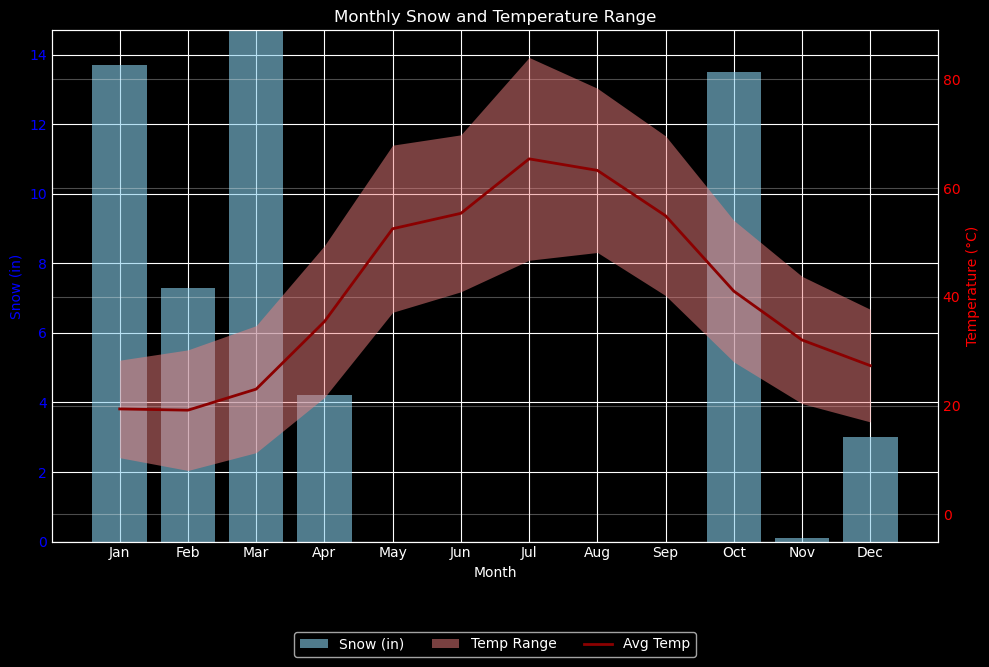

In [67]:
# KEEP
# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Data
x = grouped["MONTH"]
y1 = grouped["TMAX"]
y2 = grouped["TMIN"]

# Secondary y-axis for temperatures
ax2 = ax1.twinx()
ax2.fill_between(
    x, y1, y2, alpha=0.5, color="lightcoral", linewidth=0, label="Temp Range"
)
ax2.plot(x, (y1 + y2) / 2, linewidth=2, color="darkred", label="Avg Temp")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Dynamic temperature y-limits
y_min = min(y2.min(), 0) - 5
y_max = y1.max() + 5
ax2.set_ylim(y_min, y_max)

# Bar plot for PRCP
ax1.bar(
    x, grouped["SNOW"], color="skyblue", label="Snow (in)", alpha=0.6
)
ax1.set_xlabel("Month")
ax1.set_ylabel("Snow (in)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, grouped["SNOW"].max())

# Custom x-ticks
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Title and legend
plt.title("Monthly Snow and Temperature Range")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Grid
ax2.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

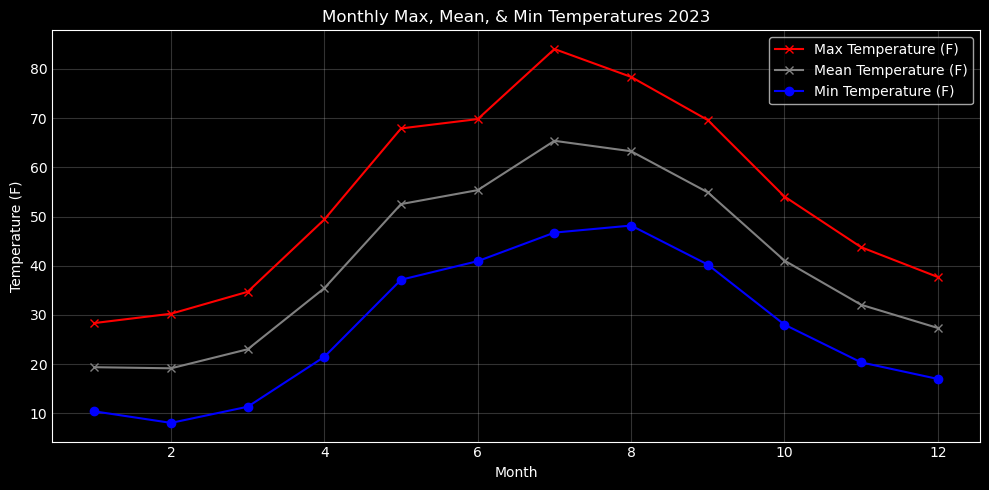

In [ ]:
# KEEP
fig, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(
    grouped["MONTH"],
    grouped["TMAX"],
    color="red",
    marker="x",
    label="Max Temperature (F)",
)
plt.plot(
    grouped["MONTH"],
    (grouped["TMAX"] + grouped["TMIN"]) / 2,
    color="grey",
    marker="x",
    label="Mean Temperature (F)",
)
plt.plot(
    grouped["MONTH"],
    grouped["TMIN"],
    color="blue",
    marker="o",
    label="Min Temperature (F)",
)
plt.xlabel("Month")
plt.ylabel("Temperature (F)")
plt.title("Monthly Max, Mean, & Min Temperatures 2023")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(
    cleane
    )
